In [216]:
import numpy as np
import matplotlib.pyplot as plt

# Define Models
## Activation Functions

In [217]:
class Sigmoid: 
    def __call__(self, x):
        return np.reciprocal(1 + np.exp(-x))
    
    def _x(self, x):
        return self(x) * (1 - self(x))
    
    def _xx(self, x):
        return self._x(x) * (1 - 2 * self(x))
    
    def _xxx(self, x):
        return self._xx(x) * (1 - 2 * self(x)) - 2 * self._x(x) ** 2
    
    def _xxxx(self, x):
        return self._xxx(x) * (1 - 2 * self(x)) - 6 * self._x(x) * self._xx(x)

class Tanh: 
    def __init__(self):
        self._g = Sigmoid()

    def __call__(self, x):
        return 2 * self._g(2 * x) - 1
    
    def _x(self, x):
        return 4 * self._g._x(2 * x)

    def _xx(self, x):
        return 8 * self._g._xx(2 * x)
    
    def _xxx(self, x):
        return 16 * self._g._xxx(2 * x)
    
    def _xxxx(self, x):
        return 32 * self._g._xxxx(2 * x)


## Neural Network

In [218]:
class MLP:
    def __init__(self, n=10, activation=Sigmoid) -> None:
        self.w = np.random.rand(4, n)
        self.a = activation()

    def __call__(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a(h)
        h = h @ self.w[3].reshape(-1, 1)
        return h
    
    def _x(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._x(h)
        h = h @ (self.w[3] * self.w[0]).reshape(-1, 1)
        return h

    def _y(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._x(h)
        h = h @ (self.w[3] * self.w[1]).reshape(-1, 1)
        return h

    def _xx(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._xx(h)
        h = h @ (self.w[3] * self.w[0]**2).reshape(-1, 1)
        return h

    def _yy(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._xx(h)
        h = h @ (self.w[3] * self.w[1]**2).reshape(-1, 1)
        return h
    
    def _xy(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._xx(h)
        h = h @ (self.w[3] * self.w[1] * self.w[0]).reshape(-1, 1)
        return h
    
    def _yx(self, x, y): return self._xy(x, y)
    
    def _yxx(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._xxx(h)
        h = h @ (self.w[3] * self.w[1] * self.w[0] ** 2).reshape(-1, 1)
        return h
    
    def _yyy(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        h = self.a._xxx(h)
        h = h @ (self.w[3] * self.w[1] ** 3).reshape(-1, 1)
        return h
    
    def _w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[3] * self.a._x(h)
        d0 = d2 * x
        d1 = d2 * y
        d3 = self.a(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _x_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[0] * self.w[3] * self.a._xx(h)
        d0 = d2 * x + self.w[3] * self.a._x(h)
        d1 = d2 * y
        d3 = self.w[0] * self.a._x(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _y_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[1] * self.w[3] * self.a._xx(h)
        d0 = d2 * x
        d1 = d2 * y + self.w[3] * self.a._x(h)
        d3 = self.w[1] * self.a._x(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _xx_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[0]**2 * self.w[3] * self.a._xxx(h)
        d0 = d2 * x + 2 * self.w[0] * self.w[3] * self.a._xx(h)
        d1 = d2 * y
        d3 = self.w[0]**2 * self.a._xx(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _yy_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[1]**2 * self.w[3] * self.a._xxx(h)
        d0 = d2 * x 
        d1 = d2 * y + 2 * self.w[1] * self.w[3] * self.a._xx(h)
        d3 = self.w[1]**2 * self.a._xx(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _xy_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[0] * self.w[1] * self.w[3] * self.a._xxx(h)
        d0 = d2 * x + self.w[1] * self.w[3] * self.a._xx(h)
        d1 = d2 * y + self.w[0] * self.w[3] * self.a._xx(h)
        d3 = self.w[0] * self.w[1] * self.a._xx(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _yx_w(self, x, y): return self._xy_w(x, y)
    
    def _yxx_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[0]**2 * self.w[1] * self.w[3] * self.a._xxxx(h)
        d0 = d2 * x + 2 * self.w[0] * self.w[1] * self.w[3] * self.a._xxx(h)
        d1 = d2 * y + self.w[0]**2 * self.w[3] * self.a._xxx(h)
        d3 = self.w[0]**2 * self.w[1] * self.a._xxx(h)
        return np.stack([d0, d1, d2, d3], axis=1)
    
    def _yyy_w(self, x, y):
        h = x * self.w[0] + y * self.w[1] + self.w[2]
        d2 = self.w[1]**3 * self.w[3] * self.a._xxxx(h)
        d0 = d2 * x
        d1 = d2 * y + 3 * self.w[1]**2 * self.w[3] * self.a._xxx(h)
        d3 = self.w[1]**3 * self.a._xxx(h)
        return np.stack([d0, d1, d2, d3], axis=1)

## Solution

In [219]:
class NeumannBC:
    def __call__(self, x):
        return 2 * np.sin(np.pi * x)
    
    def _xx(self, x):
        return - 2 * np.pi**2 * np.sin(np.pi * x)

class Solution:
    def __init__(self, N=MLP()):
        self.N = N
        self.g1 = NeumannBC()
    
    def __call__(self, x, y):
        return self.B(x, y) + x * (1-x) * y \
            * (self.N(x, y) - self.N(x, np.ones_like(x)) 
                            - self.N._y(x, np.ones_like(x)))
    
    def B(self, x, y):
        return y * (self.g1(x) - ((1 - x) * self.g1(0) + x * self.g1(1)))
        
    def _xx(self, x, y):
        return y * self.g1._xx(x) \
            - 2 * y * (self.N(x, y) - self.N(x, np.ones_like(x)) - self.N._y(x, np.ones_like(x))) \
            + 2 * (1 - 2 * x) * y * (self.N._x(x, y) - self.N._x(x, np.ones_like(x)) - self.N._yx(x, np.ones_like(x)))\
            + x * (1 - x) * y * (self.N._xx(x, y) - self.N._xx(x, np.ones_like(x)) - self.N._yxx(x, np.ones_like(x)))

    def _yy(self, x, y):
        return 2 * x * (1 - x) * (self.N._y(x, y) - self.N._y(x, np.ones_like(x)) - self.N._yy(x, np.ones_like(x)))\
            + x * (1 - x) * y * (self.N._yy(x, y) - self.N._yy(x, np.ones_like(x)) - self.N._yyy(x, np.ones_like(x)))
    
    def _xx_w(self, x, y):
        return - 2 * np.expand_dims(y, -1) * (self.N._w(x, y) - self.N._w(x, np.ones_like(x)) - self.N._y_w(x, np.ones_like(x))) \
            + 2 * np.expand_dims((1 - 2 * x) * y, -1) * (self.N._x_w(x, y) - self.N._x_w(x, np.ones_like(x)) - self.N._yx_w(x, np.ones_like(x)))\
            + np.expand_dims(x * (1 - x) * y, -1) * (self.N._xx_w(x, y) - self.N._xx_w(x, np.ones_like(x)) - self.N._yxx_w(x, np.ones_like(x)))

    def _yy_w(self, x, y):
        return 2 * np.expand_dims(x * (1 - x), -1) * (self.N._y_w(x, y) - self.N._y_w(x, np.ones_like(x)) - self.N._yy_w(x, np.ones_like(x)))\
            + np.expand_dims(x * (1 - x) * y, -1) * (self.N._yy_w(x, y) - self.N._yy_w(x, np.ones_like(x)) - self.N._yyy_w(x, np.ones_like(x)))

    def _Jacobian(self, x, y):

        B1 = np.expand_dims(x*(1-x),-1)
        B1x = np.expand_dims(1-2*x,-1)
        B1xx = -2.
        B2 = np.expand_dims(y*(1-y),-1)
        B2y = np.expand_dims(1-2*y,-1)
        B2yy = -2.

        J =  (B2*B1xx + B1*B2yy)*self.N._w(x, y) + 2 * \
            (B2*B1x*self.N._x_w(x, y) + B1*B2y*self.N._y_w(x, y)) + \
            B2*B1*(self.N._xx_w(x, y) + self.N._yy_w(x, y))

        s = np.shape(J)


        sz = [s[0],s[1]*s[2]]

        return np.reshape(J,sz).squeeze()


# Optimization

## Optimizers

In [220]:
from copy import deepcopy
class _Optimizer:
    def __init__(self, solution, alpha, silent=True):
        self.solution = solution
        self.alpha = alpha
        self.silent = silent

    @property
    def parameters(self):
        return self.solution.N.w


class SGD(_Optimizer):    
    def __call__(self, loss):
        f, g, _, _ = loss(self.solution)
        self.parameters[...] = self.parameters - self.alpha * g
        if not self.silent: return f, g
    
    def __str__(self) -> str: return 'SGD'


class Nesterov(_Optimizer):
    def __init__(self, solution, alpha, silent=True):
        super().__init__(solution, alpha, silent)
        self.k = 0
        self.x = np.copy(self.parameters)
        
    def __call__(self, loss):
        f, g, _, _ = loss(self.solution)
        x_ = self.parameters - self.alpha * g
        self.parameters[...] = (1 + self.mu) * x_ - self.mu * self.x
        self.x = x_
        if not self.silent: return f, g 

    @property
    def mu(self):
        return 1 - 3 / (5 + self.k)
    
    def __str__(self) -> str: return 'Nesterov'


class Adam(_Optimizer):
    def __init__(self, solution, alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-8, silent=True):
        super().__init__(solution, alpha, silent)
        self.beta_1, self.beta_2 = beta_1, beta_2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.k = 0
    
    def __call__(self, loss):
        self.k += 1
        f, g, _, _ = loss(self.solution)
        self.m = self.beta_1 * self.m + (1-self.beta_1) * g
        self.v = self.beta_2 * self.v + (1-self.beta_2) * (g ** 2)
        m_hat = self.m / (1 - self.beta_1 ** self.k)
        v_hat = self.v / (1 - self.beta_2 ** self.k)
        self.parameters[...] = self.parameters - self.alpha * m_hat / (np.sqrt(v_hat) + self.epsilon)
        if not self.silent: return f, g
    
    def __str__(self) -> str: return 'Adam'


class LevenberqMarquardt(_Optimizer):
    def __init__(self, solution, alpha, silent=True, rmax=1, rmin=1e-12, rho_good=0.75, rho_bad=0.25, maxit=100, eta=0.01):
        super().__init__(solution, alpha, silent)
        self.rmin = rmin
        self.rmax = rmax
        self.rho_good = rho_good
        self.rho_bad = rho_bad
        self.maxit = maxit
        self.R = 0.2*rmax
        self.eta = eta
        self.k = 0

    def __call__(self, loss):

        self.k += 1

        f, g, self.J, self.res = loss(self.solution)
        sz = np.shape(g)
        sJ = np.shape(self.J)
      
        self.J = np.reshape(self.J,[sJ[0],sJ[1]*sJ[2]])
        n, self.d = np.shape(self.J)

        Jtr = np.transpose(self.J)
        # np.matmul(Jtr, self.res)
        self.grad = np.reshape(g, sz[0]*sz[1])
        self.n, self.d = np.shape(self.J)
        
        B = np.matmul(Jtr, self.J)
        p = -np.linalg.lstsq(B, self.grad)[0]
        norm_p = np.linalg.norm(p)

        if norm_p > self.R:
            diff = np.abs(norm_p-self.R)
            iter_lam = 0
            lam_tol = 0.01*self.R
            lam = 1
            while diff > lam_tol:
                B1 = B+lam*np.eye(self.d)
                C = np.linalg.cholesky(B1)
                p = -np.linalg.solve(np.transpose(C), np.linalg.solve(C, self.grad))
                norm_p = np.linalg.norm(p)
                diff = np.abs(norm_p-self.R)
                if diff > lam_tol:
                    q = np.linalg.solve(C, p)
                    norm_q = np.linalg.norm(q)

                    lamnew = lam + np.power((norm_p/norm_q),2)*(norm_p-self.R)/self.R
                    if lamnew < 0:
                        lam = 0.5*lam
                    else:
                        lam = lamnew
                    iter_lam = iter_lam + 1
                    diff = np.abs(norm_p - self.R)

        p = np.reshape(p, sz)
        xold = np.copy(self.parameters)
        self.parameters[...] = self.parameters + p

        fnew, gnew, Jnew,rnew = loss(self.solution)
        fnew = 0.5 * np.sum((rnew) ** 2)

        p = np.reshape(p, sz[0]*sz[1])

        rho = -(f - fnew)/(np.sum(self.grad*p)+0.5*sum(p*np.matmul(B, p)))
        if rho < self.rho_bad:
            self.R = np.max([self.rmin, 0.25*self.R])
        elif rho > self.rho_good:
            self.R = np.min([self.rmax, 2.0*self.R])
        # accept or reject the step
        if rho <= self.eta:
            self.parameters[...] = xold

        if not self.silent:
            return fnew,self.grad

    def __str__(self) -> str: return 'LevenbergMarquardt'



class GaussNewton(_Optimizer):
    def __init__(self, solution, alpha, silent=True):
        super().__init__(solution, alpha, silent)

        self.k = 0
        self.gamma = 0.9

    def __call__(self,loss):
        self.k += 1

        f, g, self.J, self.res = loss(self.solution)
        sz = np.shape(g)
        sJ = np.shape(self.J)
        self.grad = np.reshape(g,sz[0]*sz[1])
        self.J = np.reshape(self.J,[sJ[0],sJ[1]*sJ[2]])
        Jtr = np.transpose(self.J)
        B = np.matmul(Jtr,self.J)
        b = np.matmul(Jtr,self.res)
      #  print(np.shape(np.expand_dims(self.J,-1)))
        p = np.linalg.lstsq(B,-b)[0]
        #p = np.matmul(np.linalg.pinv(B),-b)#-np.linalg.lstsq(self.J,-self.res)[0]
        solcopy = deepcopy(self.solution)
        aux = 0.5*np.matmul(np.transpose(self.grad),p)#self.grad*p
        p = np.reshape(p,sz)
        a = self._linesearch(loss,solcopy,1,p,aux)

        self.parameters[...] = self.parameters+a*p

        if not self.silent:

            return f, g
       
    def _linesearch(self, loss, solcopy, a, p, aux) -> float:
        f0 = loss.onlyloss(self.solution)
        f1 = f0+a*aux+1
        kmax = np.ceil(np.log(1e-14)/np.log(self.gamma))
        k = 0
    
        while (f1 > f0+a*aux and k < kmax):
            solcopy.N.w = self.parameters + a*p

            f1 = loss.onlyloss(solcopy)
            
            a = a*self.gamma
            k += 1

        return a

    def __str__(self) -> str: return 'GaussNewton'

## PDE Loss

In [221]:
class PDELoss:
    def __init__(self, x, y):
        self.x, self.y = x, y
    
    def f(self, x, y):
        return (2 - np.power(np.pi * y, 2)) * np.sin(np.pi * x)

    def __call__(self, U: Solution, x=None, y=None):
        x = x if x else self.x
        y = y if y else self.y

        u_xx = U._xx(x, y)
        u_yy = U._yy(x, y)
        u_xx_w = U._xx_w(x, y)
        u_yy_w = U._yy_w(x, y)
    
        f = self.f(x, y)
        
        L = 0.5 * np.sum((u_xx + u_yy - f) ** 2)
        L_w = np.sum(np.expand_dims(u_xx + u_yy - f, -1) * (u_xx_w + u_yy_w), axis=0)

        J = U._Jacobian(x,y)
    
        return L, L_w, J

## Groundtruth

In [222]:
def exact_solution(x, y):
    return y ** 2 * np.sin(np.pi * x)

# Train

In [223]:
xx, yy = np.meshgrid(np.linspace(0, 1, 7), np.linspace(0, 1, 7))
xy = np.stack([xx, yy], axis=-1).reshape(-1, 2)
x, y = np.split(xy, 2, -1)

sol = Solution(MLP())
loss = PDELoss(x, y)
opt = LevenberqMarquardt(sol, 1e-2, silent=False)

for i in range(50000):
    f, g = opt(loss)
    if i == 0 or (i+1) % 50 == 0: print('Epoch {}: loss = {}'.format(i, f))

C:\Users\eatoc\AppData\Local\Temp\ipykernel_28408\3944231889.py:66: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  p = -np.linalg.lstsq(B,g)[0]


Epoch 0: loss = 685.3618601949464
Epoch 49: loss = 19.94659065657538
Epoch 99: loss = 19.278025921996598
Epoch 149: loss = 18.691864951836774
Epoch 199: loss = 18.168439944695738
Epoch 249: loss = 17.69664683476663
Epoch 299: loss = 17.268437856077725
Epoch 349: loss = 16.87722195255529
Epoch 399: loss = 16.51717120563284
Epoch 449: loss = 16.183015110321964
Epoch 499: loss = 15.87004877066359
Epoch 549: loss = 15.574197311242678
Epoch 599: loss = 15.30803426596175
Epoch 649: loss = 15.090041071853452
Epoch 699: loss = 14.884942952429853
Epoch 749: loss = 14.690138634144578
Epoch 799: loss = 14.50375182704099
Epoch 849: loss = 14.398085187117703
Epoch 899: loss = 14.335885597299505
Epoch 949: loss = 14.274029083453826
Epoch 999: loss = 14.21250411725265
Epoch 1049: loss = 14.15130034774892
Epoch 1099: loss = 14.090408487295976
Epoch 1149: loss = 14.029820219155429
Epoch 1199: loss = 13.969528115513508
Epoch 1249: loss = 13.909525563476246
Epoch 1299: loss = 13.8498066975524
Epoch 1349:

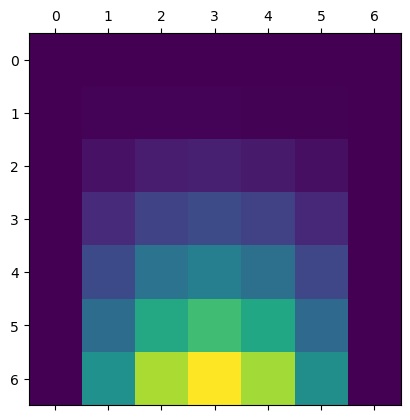

In [ ]:
plt.matshow(sol(x, y).reshape(7, 7))

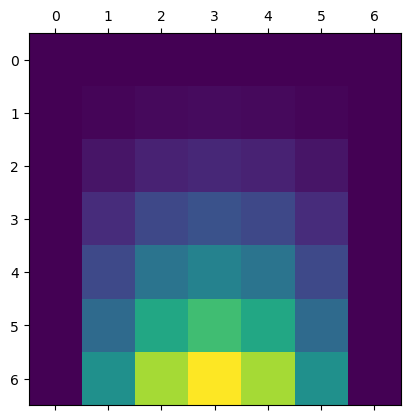

In [ ]:
plt.matshow(exact_solution(x, y).reshape(7, 7))

C:\Users\geniu\AppData\Local\Temp\ipykernel_303376\2675359059.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.hist(((sol(x, y).reshape(7, 7) - exact_solution(x, y).reshape(7, 7)) / exact_solution(x, y).reshape(7, 7)).reshape(-1))


(array([ 6.,  0.,  1.,  2.,  1.,  1.,  0.,  3.,  4., 18.]),
 array([-1.        , -0.89723005, -0.79446011, -0.69169016, -0.58892021,
        -0.48615027, -0.38338032, -0.28061038, -0.17784043, -0.07507048,
         0.02769946]),
 <BarContainer object of 10 artists>)

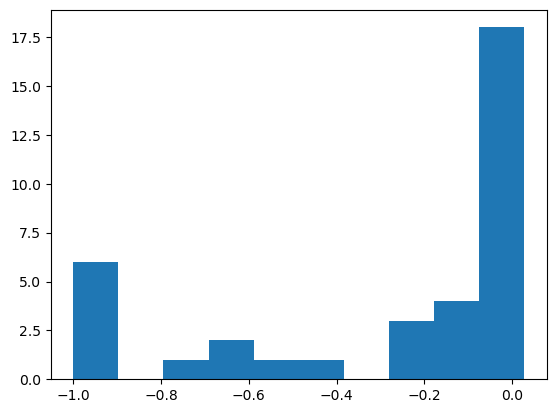

In [ ]:
plt.hist(((sol(x, y).reshape(7, 7) - exact_solution(x, y).reshape(7, 7)) / exact_solution(x, y).reshape(7, 7)).reshape(-1))